# 专题1：金融数据的可视化 —基于新冠疫情间中美股市波动的对比分析

In [2]:
import pandas as pd
import numpy as np

# 导入文件
data1 = pd.read_csv("HS300.csv")
data2 = pd.read_csv("SP500.csv")

# 提取日期
DATE1 = data1.iloc[:, 0]
DATE2 = data2.iloc[:, 0]

# 转换日期格式
date1 = pd.to_datetime(DATE1)
date2 = pd.to_datetime(DATE2)

# 创建 DataFrame
dat1 = pd.DataFrame(data1.iloc[:, 1:5].values, index=date1, columns=data1.columns[1:5])
dat2 = pd.DataFrame(data2.iloc[:, 1:5].values, index=date2, columns=data2.columns[1:5])

# 显示 Data Frame
print(dat1)
print(dat2)

                 Max       Min      Open     Close
Time                                              
2020-01-02  4172.656  4121.349  4121.349  4152.241
2020-01-03  4164.299  4131.864  4161.219  4144.965
2020-01-06  4170.638  4102.380  4120.521  4129.295
2020-01-07  4161.250  4135.097  4137.402  4160.227
2020-01-08  4149.813  4101.980  4139.632  4112.317
...              ...       ...       ...       ...
2020-12-25  5042.098  4973.681  4985.770  5042.014
2020-12-28  5089.345  5037.858  5042.943  5064.415
2020-12-29  5077.417  5034.308  5071.449  5042.936
2020-12-30  5113.711  5036.629  5037.985  5113.711
2020-12-31  5215.618  5122.480  5122.480  5211.289

[243 rows x 4 columns]
                Max      Min     Open    Close
Time                                          
2020-01-02  3258.14  3235.53  3244.67  3257.85
2020-01-03  3246.15  3222.34  3226.36  3234.85
2020-01-06  3246.84  3214.64  3217.55  3246.28
2020-01-07  3244.91  3232.43  3241.86  3237.18
2020-01-08  3267.07  3236.67  3

## 原数据可视化

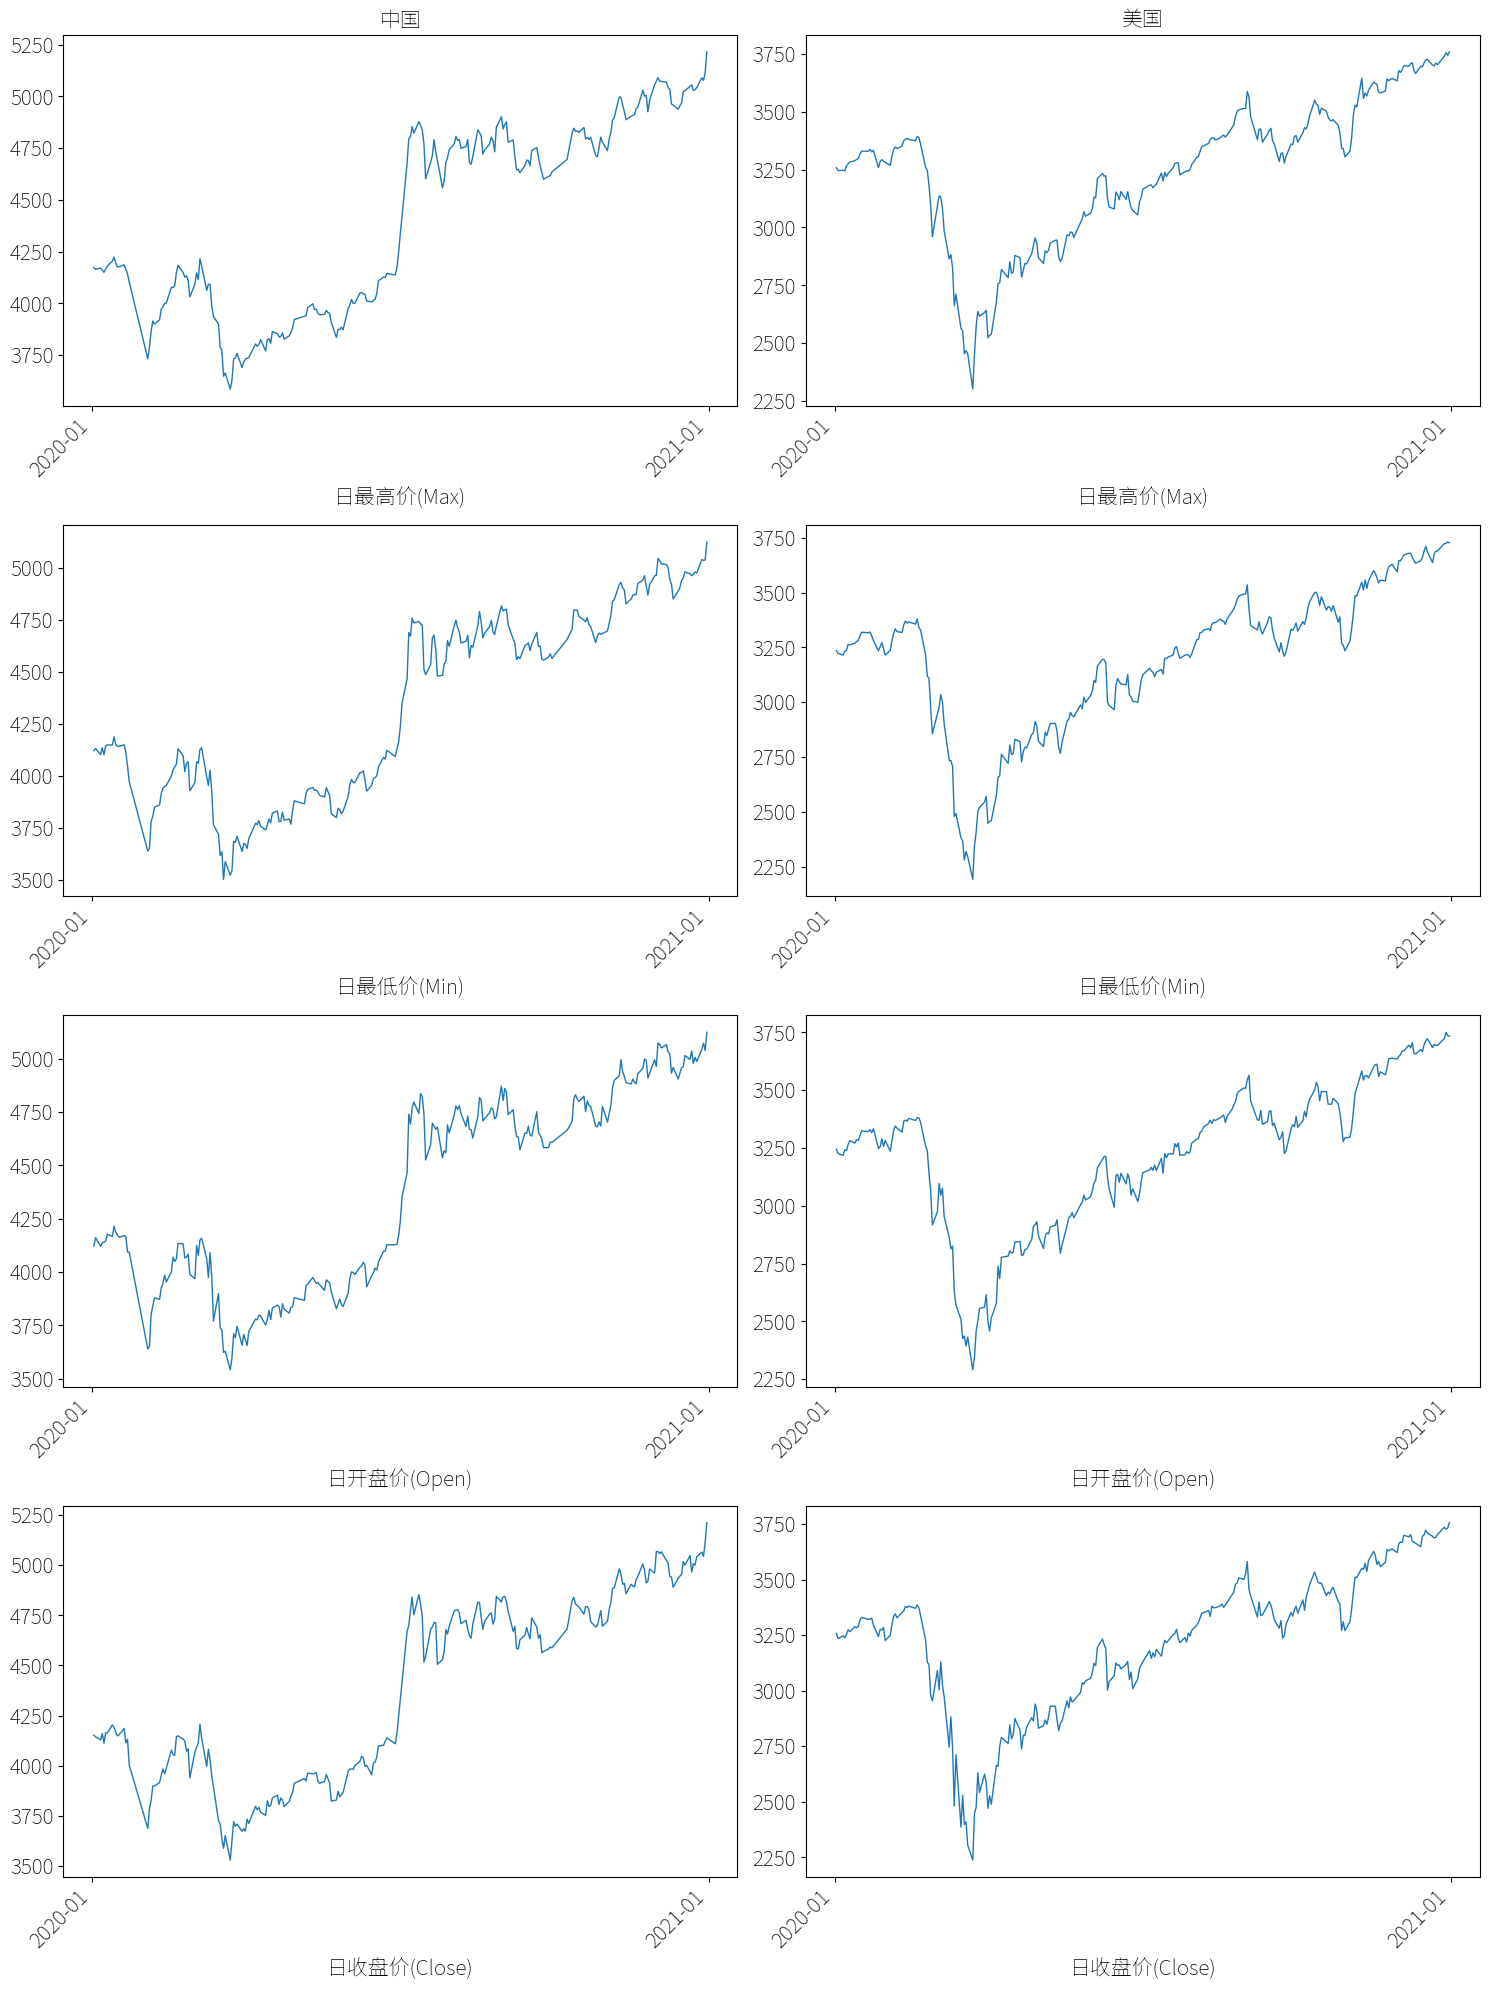

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Noto Sans SC']  # 用来正常显示中文标签，如果报错请安装字体「思源黑体」
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 布局设置
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 编写格式化数据的函数
def format_plot(ax, date, data, title, xlabel):
    ax.plot(date, data, linewidth=1)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 中国
format_plot(axs[0, 0], date1, dat1['Max'], "中国", "日最高价(Max)")
format_plot(axs[1, 0], date1, dat1['Min'], "", "日最低价(Min)")
format_plot(axs[2, 0], date1, dat1['Open'], "", "日开盘价(Open)")
format_plot(axs[3, 0], date1, dat1['Close'], "", "日收盘价(Close)")

# 美国
format_plot(axs[0, 1], date2, dat2['Max'], "美国", "日最高价(Max)")
format_plot(axs[1, 1], date2, dat2['Min'], "", "日最低价(Min)")
format_plot(axs[2, 1], date2, dat2['Open'], "", "日开盘价(Open)")
format_plot(axs[3, 1], date2, dat2['Close'], "", "日收盘价(Close)")

plt.tight_layout()
plt.show()

## 描述性统计

In [4]:
def describe(df):
    desc = df.describe()
    desc.loc['skew'] = df.skew()
    desc.loc['kurtosis'] = df.kurtosis()
    desc.loc['se'] = df.sem()
    return desc

print(describe(dat1))
print(describe(dat2))

                  Max          Min         Open        Close
count      243.000000   243.000000   243.000000   243.000000
mean      4412.674992  4344.939173  4377.384535  4383.111992
std        454.918861   449.481445   453.438536   452.735650
min       3585.801000  3503.187000  3542.684000  3530.306000
25%       3989.605000  3938.324000  3962.559000  3961.930000
50%       4590.250000  4479.393000  4524.772000  4516.253000
75%       4808.064000  4732.050500  4775.970000  4777.335000
max       5215.618000  5122.480000  5122.480000  5211.289000
skew        -0.065309    -0.062385    -0.062629    -0.062509
kurtosis    -1.554555    -1.487620    -1.532768    -1.509977
se          29.183059    28.834248    29.088096    29.043005
                  Max          Min         Open        Close
count      253.000000   253.000000   253.000000   253.000000
mean      3242.052253  3190.430870  3217.756443  3217.849921
std        308.576290   330.228728   318.342944   319.236916
min       2300.730000  2

## 计算简单收益率

In [5]:
# 计算简单收益率
R1 = dat1['Close'].diff()
R2 = dat2['Close'].diff()

Ereturn1 = R1[1:] / dat1['Close'][:-1].values
Ereturn2 = R2[1:] / dat2['Close'][:-1].values

# 重命名列
Ereturn1 = Ereturn1.to_frame(name="简单收益率")
Ereturn2 = Ereturn2.to_frame(name="简单收益率")

print(Ereturn1)
print(Ereturn2)

               简单收益率
Time                
2020-01-03 -0.001752
2020-01-06 -0.003780
2020-01-07  0.007491
2020-01-08 -0.011516
2020-01-09  0.012658
...              ...
2020-12-25  0.008400
2020-12-28  0.004443
2020-12-29 -0.004241
2020-12-30  0.014034
2020-12-31  0.019082

[242 rows x 1 columns]
               简单收益率
Time                
2020-01-03 -0.007060
2020-01-06  0.003533
2020-01-07 -0.002803
2020-01-08  0.004902
2020-01-09  0.006655
...              ...
2020-12-24  0.003537
2020-12-28  0.008723
2020-12-29 -0.002227
2020-12-30  0.001342
2020-12-31  0.006439

[252 rows x 1 columns]


## 计算对数收益率

In [6]:
# 计算对数收益率
logR1 = np.log(dat1['Close'])
logr1 = logR1.diff()
logreturn1 = logr1.iloc[1:]
logreturn1 = logreturn1.to_frame(name="对数收益率")

date11 = date1[1:]
date21 = date11[:-1]

logR2 = np.log(dat2['Close'])
logr2 = logR2.diff()
logreturn2 = logr2.iloc[1:]
logreturn2 = logreturn2.to_frame(name="对数收益率")

date12 = date2[1:]
date22 = date12[:-1]

print(logreturn1)
print(logreturn2)

               对数收益率
Time                
2020-01-03 -0.001754
2020-01-06 -0.003788
2020-01-07  0.007463
2020-01-08 -0.011583
2020-01-09  0.012578
...              ...
2020-12-25  0.008365
2020-12-28  0.004433
2020-12-29 -0.004250
2020-12-30  0.013937
2020-12-31  0.018902

[242 rows x 1 columns]
               对数收益率
Time                
2020-01-03 -0.007085
2020-01-06  0.003527
2020-01-07 -0.002807
2020-01-08  0.004890
2020-01-09  0.006633
...              ...
2020-12-24  0.003530
2020-12-28  0.008685
2020-12-29 -0.002230
2020-12-30  0.001341
2020-12-31  0.006418

[252 rows x 1 columns]


## 计算波动率

In [7]:
Vol1 = ((np.log(data1['Max']) - np.log(data1['Min'])) ** 2) * 0.361
Vol2 = ((np.log(data2['Max']) - np.log(data2['Min'])) ** 2) * 0.361

print(Vol1)
print(Vol2)

0      0.000055
1      0.000022
2      0.000098
3      0.000014
4      0.000049
         ...   
238    0.000067
239    0.000037
240    0.000026
241    0.000083
242    0.000117
Length: 243, dtype: float64
0      0.000018
1      0.000020
2      0.000036
3      0.000005
4      0.000032
         ...   
248    0.000006
249    0.000008
250    0.000028
251    0.000005
252    0.000029
Length: 253, dtype: float64


### 波动率可视化

(0.0, 0.003)

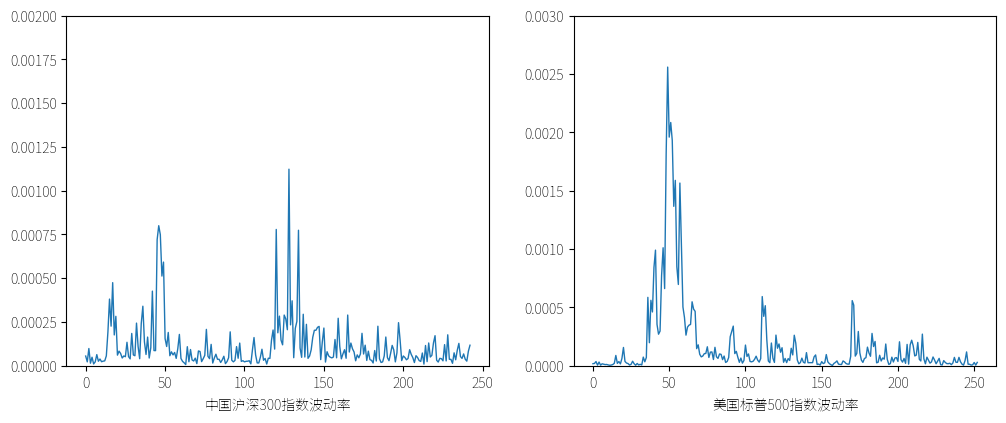

In [8]:
plt.figure(figsize=(12, 10))

# 折线图
plt.subplot(2, 2, 1)
plt.plot(Vol1.index, Vol1, linewidth=1)
plt.xlabel("中国沪深300指数波动率")
plt.ylim(0, 0.002)

plt.subplot(2, 2, 2)
plt.plot(Vol2.index, Vol2, linewidth=1)
plt.xlabel("美国标普500指数波动率")
plt.ylim(0, 0.003)

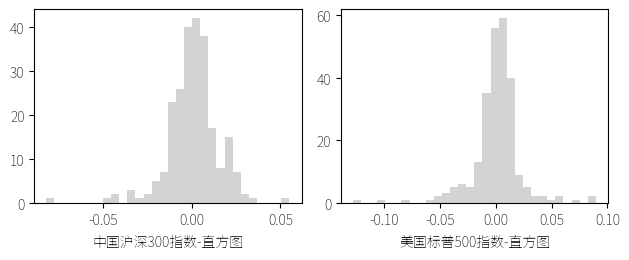

In [9]:
# 直方图
plt.subplot(2, 2, 3)
plt.hist(logreturn1, bins=30, color='lightgray')
plt.xlabel("中国沪深300指数-直方图")

plt.subplot(2, 2, 4)
plt.hist(logreturn2, bins=30, color='lightgray')
plt.xlabel("美国标普500指数-直方图")

plt.tight_layout()
plt.show()

## 核密度估计

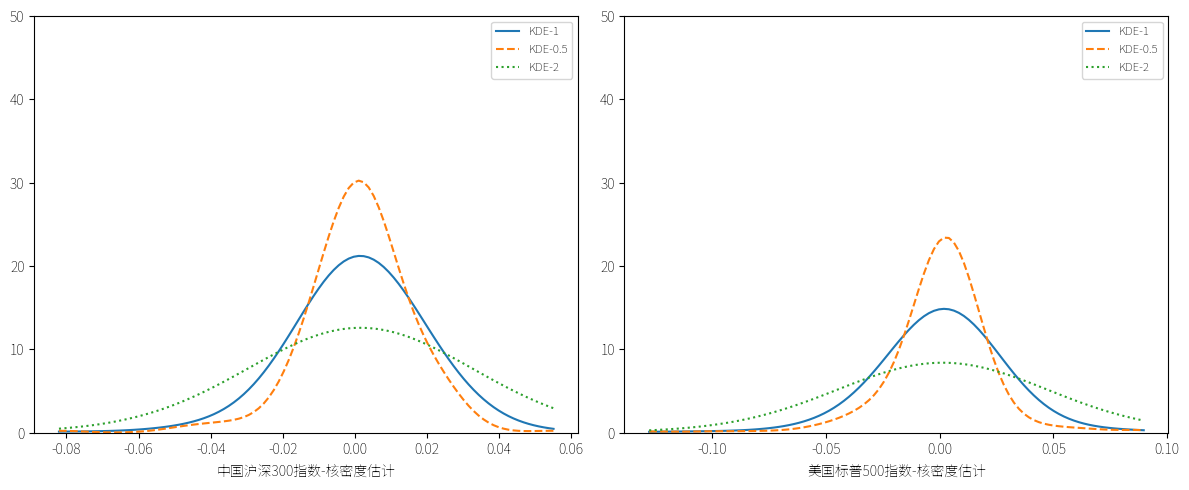

In [17]:
from scipy import stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# HS300 Index
x1 = np.linspace(logreturn1['对数收益率'].min(), logreturn1['对数收益率'].max(), 100)
for i, bw in enumerate([1, 0.5, 2]):
    kde = stats.gaussian_kde(logreturn1['对数收益率'].values, bw_method=bw)
    ax1.plot(x1, kde(x1), linestyle=['-', '--', ':'][i], label=f'KDE-{bw}')

ax1.set_xlabel("中国沪深300指数-核密度估计")
ax1.set_ylim(0, 50)
ax1.legend(loc='upper right', fontsize='small')

# SP500 Index
x2 = np.linspace(logreturn2['对数收益率'].min(), logreturn2['对数收益率'].max(), 100)
for i, bw in enumerate([1, 0.5, 2]):
    kde = stats.gaussian_kde(logreturn2['对数收益率'].values, bw_method=bw)
    ax2.plot(x2, kde(x2), linestyle=['-', '--', ':'][i], label=f'KDE-{bw}')

ax2.set_xlabel("美国标普500指数-核密度估计")
ax2.set_ylim(0, 50)
ax2.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()